In [ ]:
#Prediksi Harga Saham Menggunakan Metode ARIMA

# Mengimpor library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from google.colab import files

In [ ]:
# Mengunggah file dari komputer
uploaded = files.upload()


Saving BBRI.JK (1).csv to BBRI.JK (1).csv


In [ ]:
# Membaca file CSV yang diunggah
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-05-17,5250.0,5250.0,5175.0,5200.0,4935.566895,115834500
1,2023-05-19,5225.0,5450.0,5200.0,5400.0,5125.396484,185672200
2,2023-05-22,5300.0,5500.0,5300.0,5425.0,5149.125000,162655900
3,2023-05-23,5475.0,5600.0,5475.0,5500.0,5220.311035,255251600
4,2023-05-24,5525.0,5600.0,5450.0,5600.0,5315.226074,187436100
...,...,...,...,...,...,...,...
231,2024-05-13,4650.0,4700.0,4630.0,4680.0,4680.000000,320067100
232,2024-05-14,4720.0,4810.0,4700.0,4730.0,4730.000000,341458900
233,2024-05-15,4780.0,4870.0,4760.0,4820.0,4820.000000,298990300
234,2024-05-16,4930.0,4960.0,4840.0,4840.0,4840.000000,371295000


In [ ]:
# Menampilkan beberapa baris pertama dari data
print(df.head())

         Date    Open    High     Low   Close    Adj Close     Volume
0  2023-05-17  5250.0  5250.0  5175.0  5200.0  4935.566895  115834500
1  2023-05-19  5225.0  5450.0  5200.0  5400.0  5125.396484  185672200
2  2023-05-22  5300.0  5500.0  5300.0  5425.0  5149.125000  162655900
3  2023-05-23  5475.0  5600.0  5475.0  5500.0  5220.311035  255251600
4  2023-05-24  5525.0  5600.0  5450.0  5600.0  5315.226074  187436100


In [ ]:
# Mengatur kolom tanggal sebagai index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

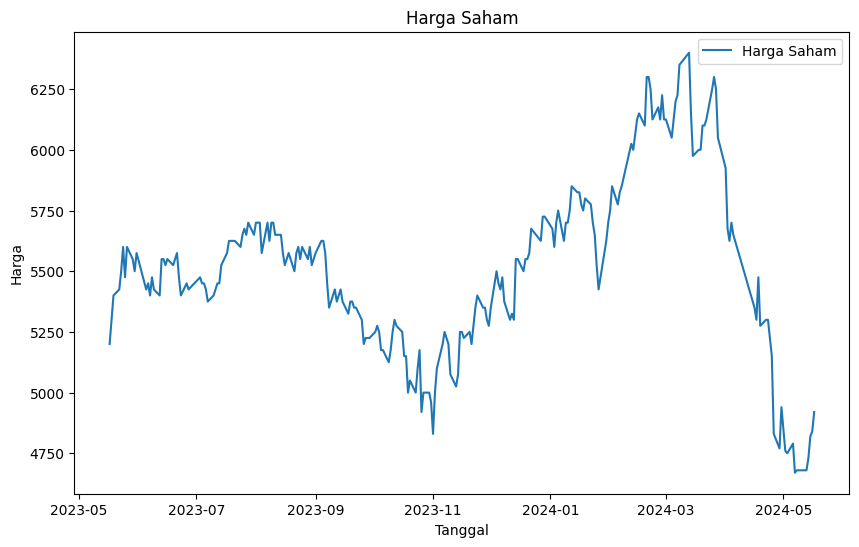

In [ ]:
# Menampilkan plot harga saham
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='Harga Saham')
plt.title('Harga Saham')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.show()

In [ ]:
# Membagi data menjadi training dan testing
train_size = int(len(df) * 0.8)
train, test = df['Close'][:train_size], df['Close'][train_size:]


In [ ]:
# Menjalankan model ARIMA
model = ARIMA(train, order=(5, 1, 0))  # Order ARIMA(p, d, q)
fitted_model = model.fit()

# Memprediksi nilai pada data testing
predictions = fitted_model.forecast(steps=len(test))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

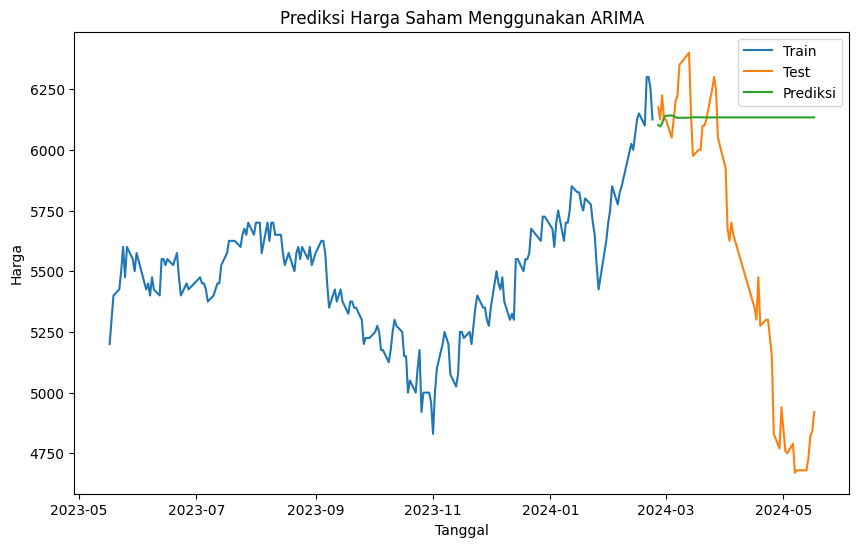

In [ ]:
# Menampilkan hasil prediksi vs nilai aktual
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predictions, label='Prediksi')
plt.title('Prediksi Harga Saham Menggunakan ARIMA')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.show()

In [ ]:
# Menghitung nilai MAPE, RMSE, dan MAE
mape = np.mean(np.abs((test - predictions) / test)) * 100
rmse = np.sqrt(mean_squared_error(test, predictions))
mae = mean_absolute_error(test, predictions)

print(f'Nilai MAPE: {mape:.2f}%')
print(f'Nilai RMSE: {rmse:.2f}')
print(f'Nilai MAE: {mae:.2f}')

Nilai MAPE: nan%
Nilai RMSE: 799.50
Nilai MAE: 590.36


<ipython-input-15-fb0975bfcfad>:2: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((test - predictions) / test)) * 100
